### Logistic Regression on csv data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, roc_curve, auc, 
                           precision_recall_curve, roc_auc_score)
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
df = pd.read_csv("HeartDiseaseTrain-Test.csv")
df.head()

age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1                     Yes      3.1    Upsloping                          Zero   
2                     Yes      2.6    Upsloping                          Zero   
3                      No      0.0  Downsloping                           One   
4                      No      1.9         Flat                         Three   

         thalassemia  target  
0  Reversable Defect       0  
1  Reversable Defect       0  
2  Reversable Defect       0  
3  Reversable Defect       0  
4       Fixed Defect       0

In [3]:
print(df.describe())

               age  resting_blood_pressure  cholestoral  Max_heart_rate  \
count  1025.000000             1025.000000   1025.00000     1025.000000   
mean     54.434146              131.611707    246.00000      149.114146   
std       9.072290               17.516718     51.59251       23.005724   
min      29.000000               94.000000    126.00000       71.000000   
25%      48.000000              120.000000    211.00000      132.000000   
50%      56.000000              130.000000    240.00000      152.000000   
75%      61.000000              140.000000    275.00000      166.000000   
max      77.000000              200.000000    564.00000      202.000000   

           oldpeak       target  
count  1025.000000  1025.000000  
mean      1.071512     0.513171  
std       1.175053     0.500070  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.800000     1.000000  
75%       1.800000     1.000000  
max       6.200000     1.000000  


In [4]:
# Check dataset structure
print("Dataset columns:")
print(df.columns.tolist())
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

Dataset columns:
['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia', 'target']

Dataset shape: (1025, 14)

First few rows:
   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lo

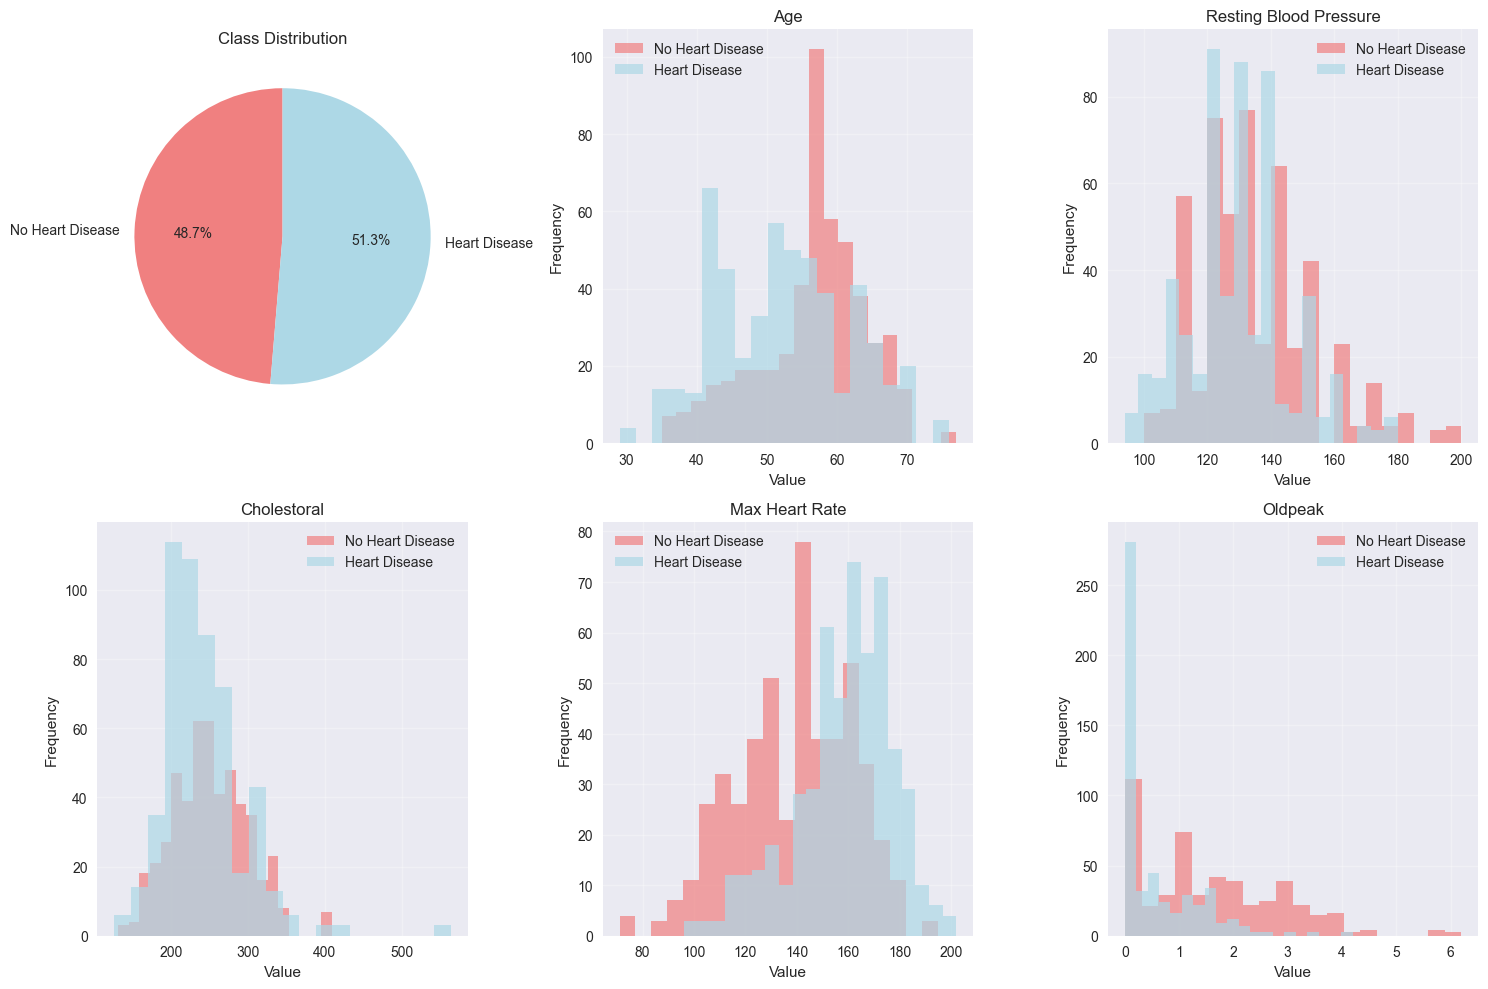

No Heart Disease (0): 499 samples (48.7%)
Heart Disease (1): 526 samples (51.3%)


In [5]:
# Visualize class distribution and key features
plt.figure(figsize=(15, 10))

# Class distribution
plt.subplot(2, 3, 1)
class_counts = pd.Series(df['target']).value_counts().sort_index()
colors = ['lightcoral', 'lightblue']
labels = ['No Heart Disease', 'Heart Disease']
plt.pie(class_counts.values, labels=labels, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Class Distribution')

# Select key numerical features for visualization
key_features = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']

for i, feature in enumerate(key_features, 2):
    if i > 6:  # Only plot 5 additional features to fit in 2x3 grid
        break
    plt.subplot(2, 3, i)
    
    # Plot distributions for each class using DataFrame
    no_disease_data = df[df['target'] == 0][feature]
    disease_data = df[df['target'] == 1][feature]
    
    plt.hist(no_disease_data, alpha=0.7, label='No Heart Disease', bins=20, color='lightcoral')
    plt.hist(disease_data, alpha=0.7, label='Heart Disease', bins=20, color='lightblue')
    
    plt.title(f'{feature.replace("_", " ").title()}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"No Heart Disease (0): {class_counts[0]} samples ({class_counts[0]/len(df['target'])*100:.1f}%)")
print(f"Heart Disease (1): {class_counts[1]} samples ({class_counts[1]/len(df['target'])*100:.1f}%)")

In [6]:
# Check for missing values and data types
print("Missing values per column:")
print(df.isnull().sum())

print("\nTotal missing values:", df.isnull().sum().sum())

print("\nData types:")
print(df.dtypes.value_counts())

Missing values per column:
age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

Total missing values: 0

Data types:
object     8
int64      5
float64    1
Name: count, dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder
# Encode features using LabelEncoder
encoders = {}  # Dictionary to store encoder for each column

for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Save encoder for later use

X = df.drop('target', axis=1)
y = df['target']
df.head()

age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0   18    1                3                      18           43   
1   19    1                3                      28           34   
2   36    1                3                      31           12   
3   27    1                3                      33           34   
4   28    0                3                      27          116   

   fasting_blood_sugar  rest_ecg  Max_heart_rate  exercise_induced_angina  \
0                    1         2              67                        0   
1                    0         1              54                        1   
2                    1         2              25                        1   
3                    1         2              60                        0   
4                    0         2               9                        0   

   oldpeak  slope  vessels_colored_by_flourosopy  thalassemia  target  
0       10      0                              3            3       0  
1       29      2                              4            3       0  
2       25      2                              4            3       0  
3        0      0                              1            3       0  
4       18      1                              2            0       0

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Original data shape: {X.shape}")
print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

# Check scaling effect (using numpy arrays to avoid DataFrame issues)
print(f"\nBefore scaling - Mean: {X_train.values.mean():.3f}, Std: {X_train.values.std():.3f}")
print(f"After scaling - Mean: {X_train_scaled.mean():.3f}, Std: {X_train_scaled.std():.3f}")

# Show feature scaling statistics per feature
print(f"\nFeature scaling summary:")
print(f"Mean of scaled features (should be ~0): {X_train_scaled.mean(axis=0).mean():.6f}")
print(f"Std of scaled features (should be ~1): {X_train_scaled.std(axis=0).mean():.6f}")

Original data shape: (1025, 13)
Training set: (820, 13)
Test set: (205, 13)
Training class distribution: [399 421]
Test class distribution: [100 105]

Before scaling - Mean: 14.381, Std: 25.625
After scaling - Mean: 0.000, Std: 1.000

Feature scaling summary:
Mean of scaled features (should be ~0): 0.000000
Std of scaled features (should be ~1): 1.000000


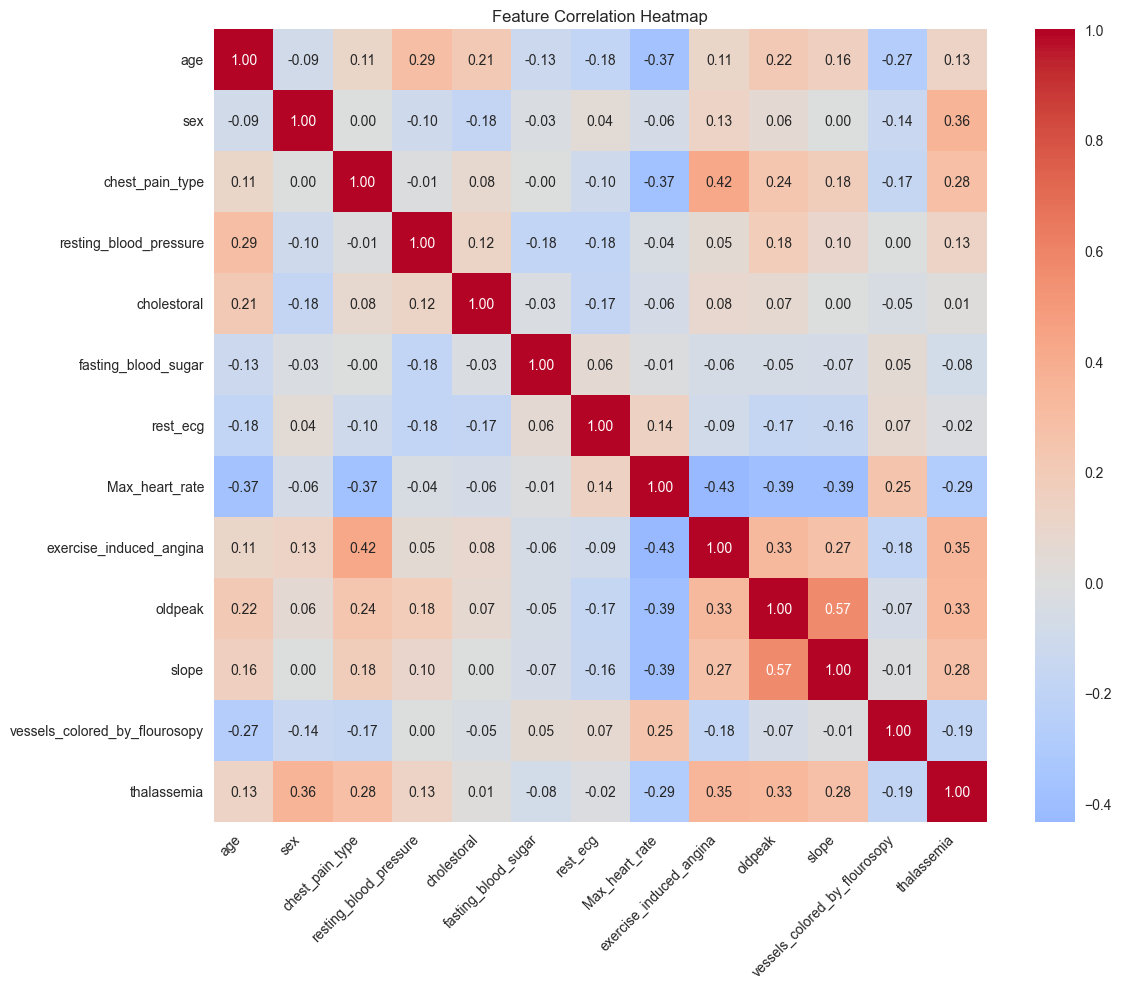

In [9]:
# Correlation heatmap for selected features
plt.figure(figsize=(12, 10))

# Select subset of features for correlation analysis
selected_features = [
'age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia'
]


# Get indices of selected features
selected_indices = [df.columns.get_loc(feature) for feature in selected_features]

# Create correlation matrix
correlation_matrix = np.corrcoef(X_train_scaled[:, selected_indices].T)

# Plot heatmap
sns.heatmap(correlation_matrix, 
            xticklabels=selected_features,
            yticklabels=selected_features,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Create and train Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)
y_pred_proba = lr.predict_proba(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Cross-validation score
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")

Logistic Regression Accuracy: 0.8585
Cross-validation scores: [0.83536585 0.81707317 0.81097561 0.82317073 0.79268293]
Mean CV score: 0.8159 (+/- 0.0282)
ROC AUC Score: 0.9316


In [11]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Note: l1 penalty only works with liblinear and saga solvers
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the best model
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(X_test_scaled)
y_pred_proba_best = best_lr.predict_proba(X_test_scaled)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best model test accuracy: {accuracy_best:.4f}")

# Compare models
print(f"\nModel Comparison:")
print(f"Default LR Accuracy: {accuracy:.4f}")
print(f"Tuned LR Accuracy: {accuracy_best:.4f}")
print(f"Improvement: {accuracy_best - accuracy:.4f}")

Best parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation score: 0.8256097560975609
Best model test accuracy: 0.8146

Model Comparison:
Default LR Accuracy: 0.8585
Tuned LR Accuracy: 0.8146
Improvement: -0.0439


In [12]:
# Classification Report
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best, target_names=labels))

Classification Report (Best Model):
                  precision    recall  f1-score   support

No Heart Disease       0.88      0.72      0.79       100
   Heart Disease       0.77      0.90      0.83       105

        accuracy                           0.81       205
       macro avg       0.83      0.81      0.81       205
    weighted avg       0.82      0.81      0.81       205



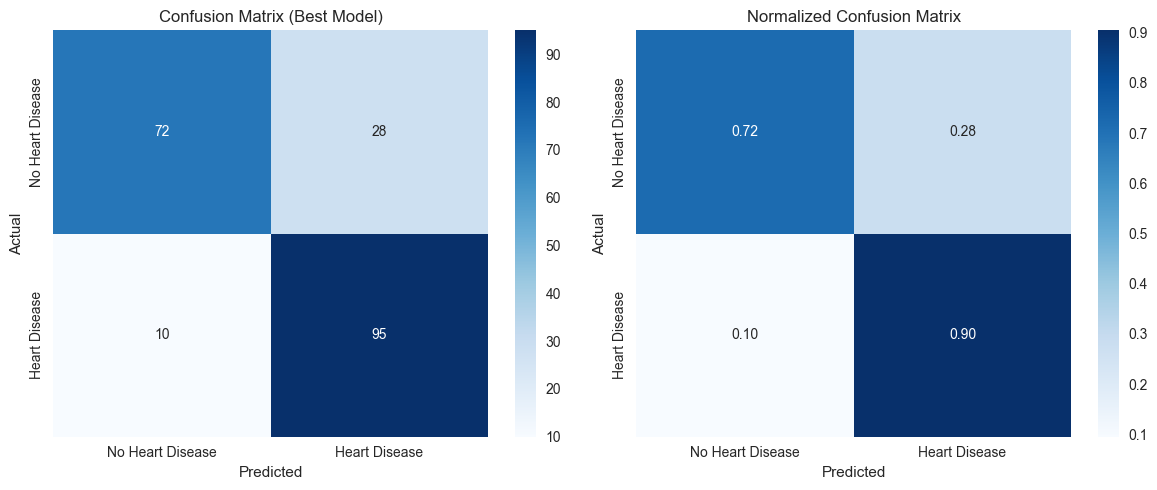

True Negatives: 72
False Positives: 28
False Negatives: 10
True Positives: 95
Sensitivity (Recall): 0.9048
Specificity: 0.7200
Precision: 0.7724
F1-Score: 0.8333


In [13]:
# Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, 
            yticklabels=labels)
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
# Normalized confusion matrix
cm_normalized = confusion_matrix(y_test, y_pred_best, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=labels, 
            yticklabels=labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Calculate confusion matrix metrics
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Sensitivity (Recall): {tp/(tp+fn):.4f}")
print(f"Specificity: {tn/(tn+fp):.4f}")
print(f"Precision: {tp/(tp+fp):.4f}")
print(f"F1-Score: {2*tp/(2*tp+fp+fn):.4f}")

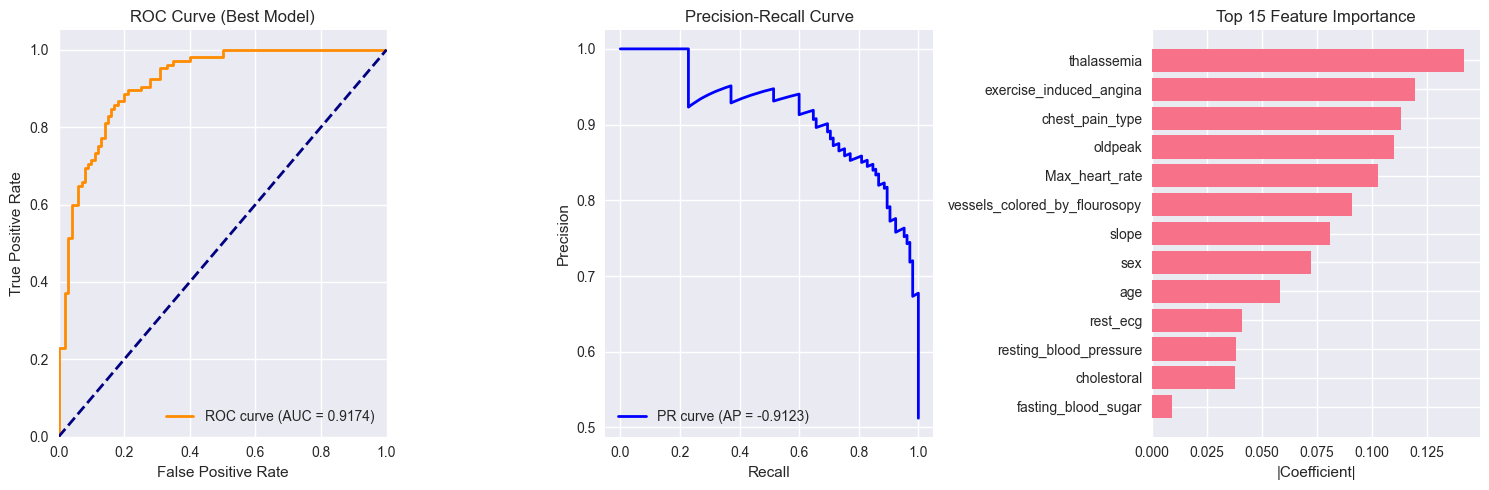

ROC AUC Score: 0.9174
Average Precision Score: -0.9123


In [14]:
# ROC Curve and Precision-Recall Curve
plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best[:, 1])
roc_auc_best = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc_best:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Best Model)')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 3, 2)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_best[:, 1])
avg_precision = np.trapz(precision, recall)

plt.plot(recall, precision, color='blue', lw=2,
         label=f'PR curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Feature Importance (Coefficients)
plt.subplot(1, 3, 3)
feature_importance = abs(best_lr.coef_[0])
feature_names = df.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[-15:]  # Top 15 features
top_features = [feature_names[i] for i in sorted_idx]
top_importance = feature_importance[sorted_idx]

plt.barh(range(len(top_features)), top_importance)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('|Coefficient|')
plt.title('Top 15 Feature Importance')
plt.tight_layout()

plt.tight_layout()
plt.show()

print(f"ROC AUC Score: {roc_auc_best:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")

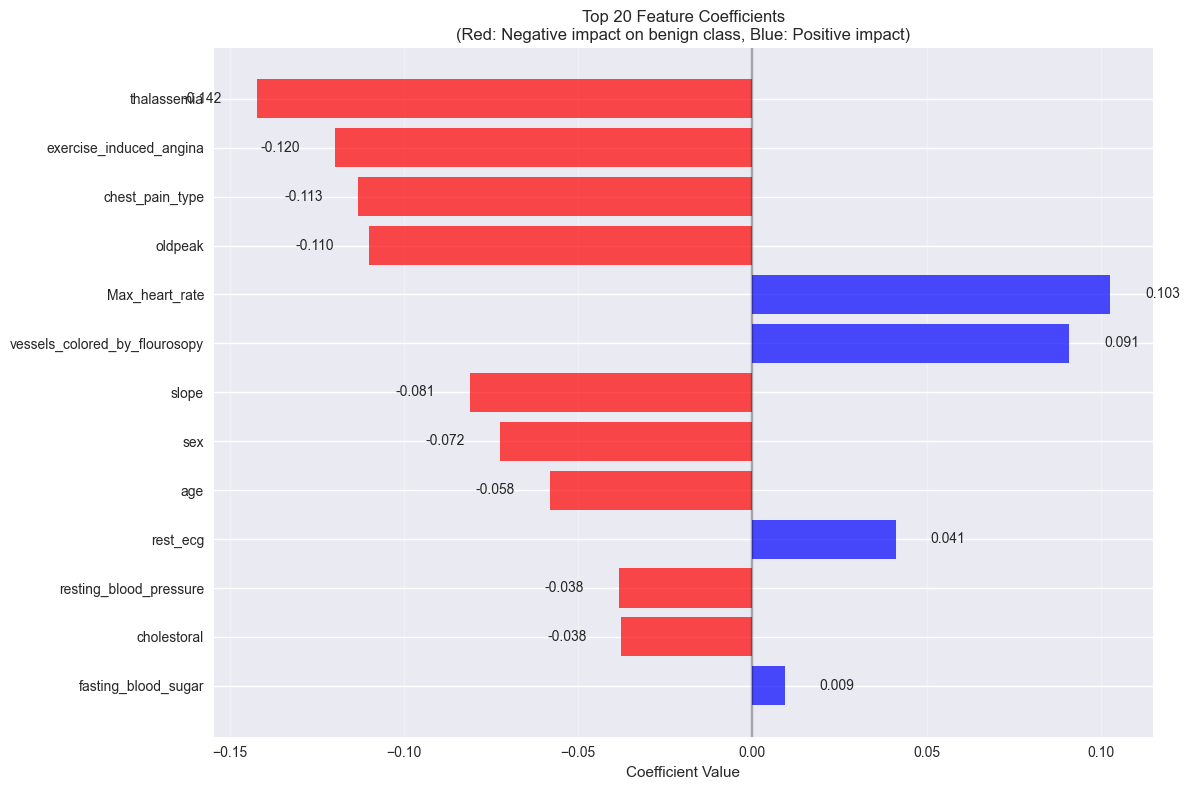

Top 10 Most Important Features:
                          feature  coefficient  abs_coefficient
6                        rest_ecg     0.041093         0.041093
0                             age    -0.058124         0.058124
1                             sex    -0.072411         0.072411
10                          slope    -0.081024         0.081024
11  vessels_colored_by_flourosopy     0.090920         0.090920
7                  Max_heart_rate     0.102694         0.102694
9                         oldpeak    -0.110060         0.110060
2                 chest_pain_type    -0.113254         0.113254
8         exercise_induced_angina    -0.119691         0.119691
12                    thalassemia    -0.142256         0.142256


In [15]:
# Detailed Feature Importance Analysis
plt.figure(figsize=(12, 8))

# Get all coefficients and feature names
coefficients = best_lr.coef_[0]
feature_names = X.columns

# Create a dataframe for easier handling
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': np.abs(coefficients)
}).sort_values('abs_coefficient', ascending=True)

# Plot top 20 features
top_20 = coef_df.tail(20)

colors = ['red' if x < 0 else 'blue' for x in top_20['coefficient']]
plt.barh(range(len(top_20)), top_20['coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_20)), top_20['feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 20 Feature Coefficients\n(Red: Negative impact on benign class, Blue: Positive impact)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(top_20.iterrows()):
    plt.text(row['coefficient'] + (0.01 if row['coefficient'] > 0 else -0.01), i, 
             f'{row["coefficient"]:.3f}', 
             va='center', ha='left' if row['coefficient'] > 0 else 'right')

plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(coef_df.tail(10)[['feature', 'coefficient', 'abs_coefficient']])

## MultinomialNB 

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Create and train Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions
y_pred = mnb.predict(X_test)
y_pred_proba = mnb.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Accuracy: {accuracy:.4f}")

# Cross-validation score
cv_scores = cross_val_score(mnb, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Multinomial Naive Bayes Accuracy: 0.7463
Cross-validation scores: [0.76219512 0.74390244 0.7195122  0.80487805 0.73170732]
Mean CV score: 0.7524 (+/- 0.0595)


In [18]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.76      0.70      0.73       100
   Heart Disease       0.73      0.79      0.76       105

        accuracy                           0.75       205
       macro avg       0.75      0.75      0.75       205
    weighted avg       0.75      0.75      0.75       205



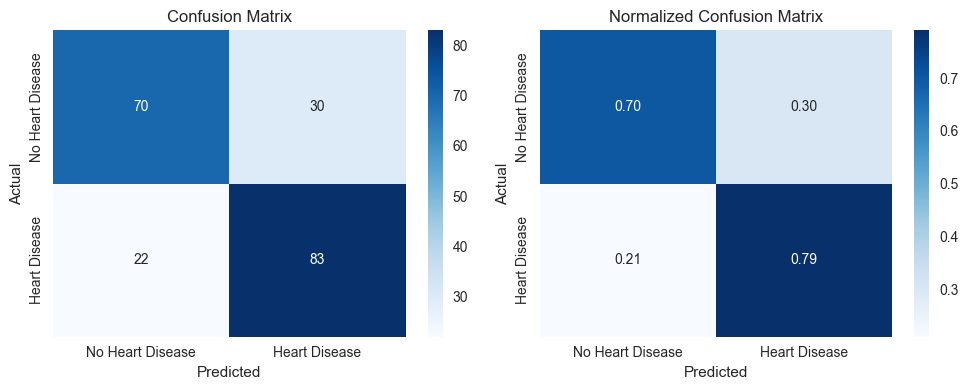

True Negatives: 70
False Positives: 30
False Negatives: 22
True Positives: 83
Sensitivity (Recall): 0.7905
Specificity: 0.7000
Precision: 0.7345
F1-Score: 0.7615


In [19]:
# Confusion Matrix
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, 
            yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
# Normalized confusion matrix
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=labels, 
            yticklabels=labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Calculate confusion matrix metrics
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")
print(f"Sensitivity (Recall): {tp/(tp+fn):.4f}")
print(f"Specificity: {tn/(tn+fp):.4f}")
print(f"Precision: {tp/(tp+fp):.4f}")
print(f"F1-Score: {2*tp/(2*tp+fp+fn):.4f}")

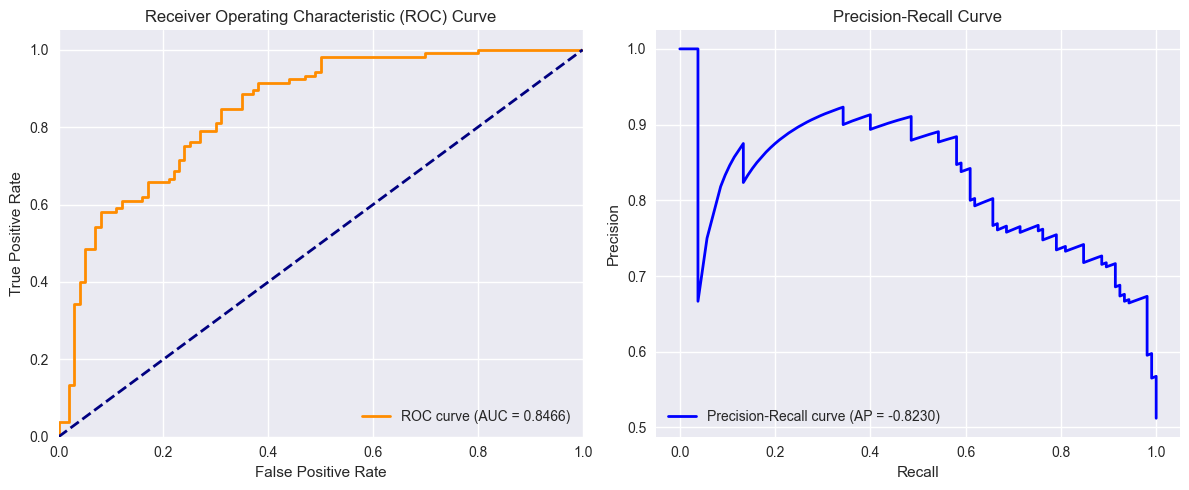

ROC AUC Score: 0.8466
Average Precision Score: -0.8230


In [20]:
# ROC Curve and AUC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
avg_precision = np.trapz(precision, recall)

plt.plot(recall, precision, color='blue', lw=2,
         label=f'Precision-Recall curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")

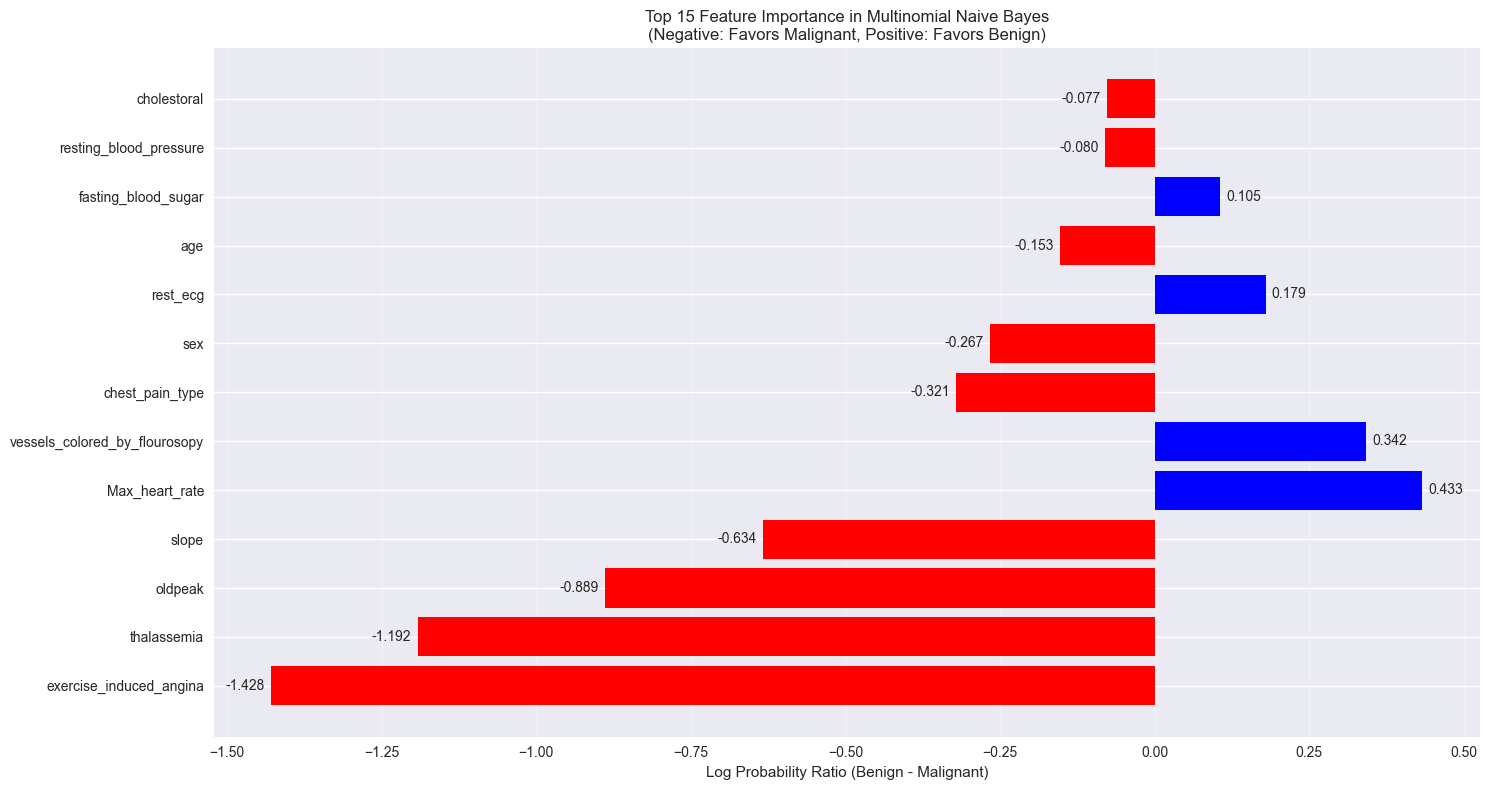

In [21]:
# Feature Importance (Log Probabilities)
plt.figure(figsize=(15, 8))

# Get log probabilities for each feature for each class
log_prob_ratio = mnb.feature_log_prob_[1] - mnb.feature_log_prob_[0]

# Sort features by importance
feature_importance = list(zip(df.columns, log_prob_ratio))
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Plot top 15 most important features
top_features = feature_importance[:15]
features, importances = zip(*top_features)

plt.barh(range(len(features)), importances, color=['red' if imp < 0 else 'blue' for imp in importances])
plt.yticks(range(len(features)), features)
plt.xlabel('Log Probability Ratio (Benign - Malignant)')
plt.title('Top 15 Feature Importance in Multinomial Naive Bayes\n(Negative: Favors Malignant, Positive: Favors Benign)')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (feature, importance) in enumerate(top_features):
    plt.text(importance + (0.01 if importance > 0 else -0.01), i, 
             f'{importance:.3f}', va='center', 
             ha='left' if importance > 0 else 'right')

plt.tight_layout()
plt.show()

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
# Create and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

print("🔹 Random Forest Model Trained Successfully!")
print(f"Number of trees: {rf_classifier.n_estimators}")
print(f"Number of features: {rf_classifier.n_features_in_}")
print(f"Feature names: {len(df.columns)} features")

🔹 Random Forest Model Trained Successfully!
Number of trees: 100
Number of features: 13
Feature names: 14 features


In [24]:
# Make predictions
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)

# Calculate accuracy scores
train_accuracy = rf_classifier.score(X_train, y_train)
test_accuracy = rf_classifier.score(X_test, y_test)

print("🔹 Model Performance:")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba[:, 1]):.4f}")

# Classification report
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))

🔹 Model Performance:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
ROC AUC Score: 1.0000

🔹 Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       100
   Heart Disease       1.00      1.00      1.00       105

        accuracy                           1.00       205
       macro avg       1.00      1.00      1.00       205
    weighted avg       1.00      1.00      1.00       205



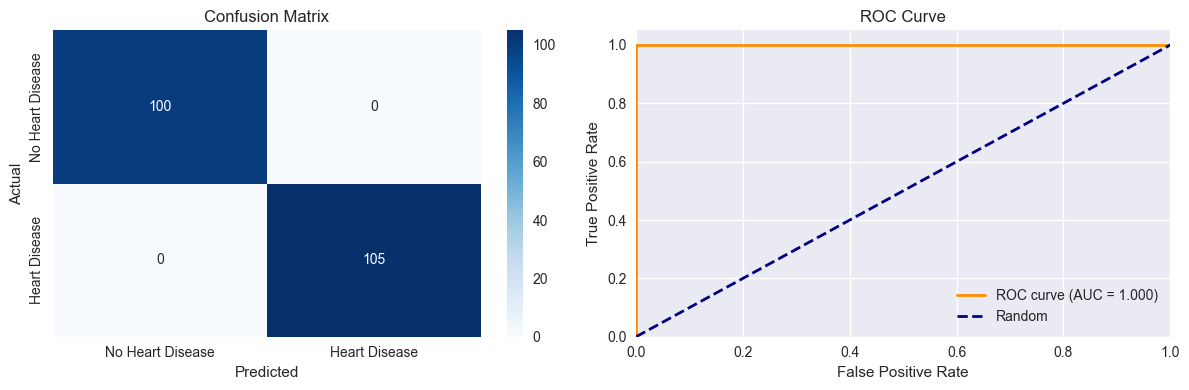

In [25]:
# Confusion Matrix
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

🔹 Top 10 Most Important Features:
                          feature  importance
2                 chest_pain_type    0.144423
7                  Max_heart_rate    0.114513
12                    thalassemia    0.107506
11  vessels_colored_by_flourosopy    0.104301
9                         oldpeak    0.102753
0                             age    0.093286
4                     cholestoral    0.084241
3          resting_blood_pressure    0.072045
8         exercise_induced_angina    0.071660
10                          slope    0.046165


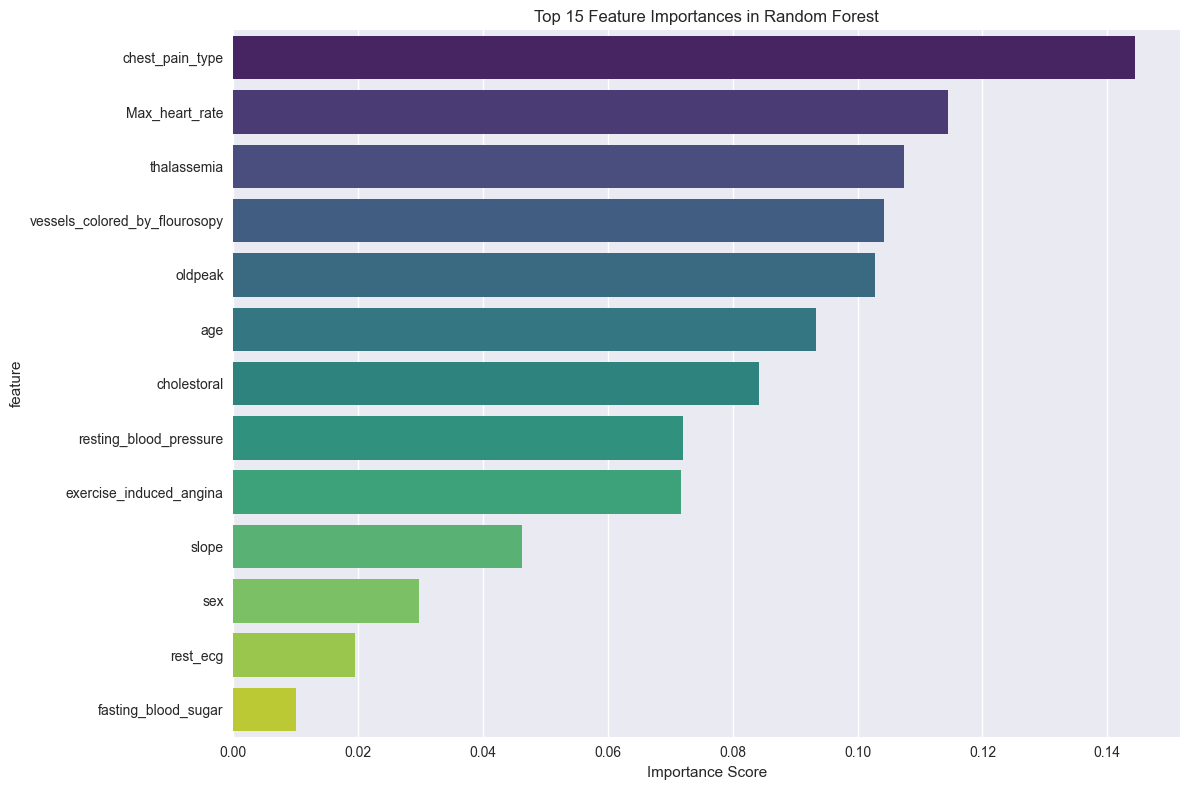

In [26]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("🔹 Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
plt.title('Top 15 Feature Importances in Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [27]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("🔹 Starting Grid Search for hyperparameter tuning...")
print("This may take a few minutes...")

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n🔹 Best Parameters: {grid_search.best_params_}")
print(f"🔹 Best Cross-validation Score: {grid_search.best_score_:.4f}")

🔹 Starting Grid Search for hyperparameter tuning...
This may take a few minutes...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

🔹 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
🔹 Best Cross-validation Score: 0.9841


In [28]:
# Evaluate the best model
best_rf = grid_search.best_estimator_
best_y_pred = best_rf.predict(X_test)
best_y_pred_proba = best_rf.predict_proba(X_test)

print("🔹 Optimized Model Performance:")
print(f"Training Accuracy: {best_rf.score(X_train, y_train):.4f}")
print(f"Testing Accuracy: {best_rf.score(X_test, y_test):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, best_y_pred_proba[:, 1]):.4f}")

print("\n🔹 Optimized Classification Report:")
print(classification_report(y_test, best_y_pred, target_names=labels))

🔹 Optimized Model Performance:
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
ROC AUC Score: 1.0000

🔹 Optimized Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       100
   Heart Disease       1.00      1.00      1.00       105

        accuracy                           1.00       205
       macro avg       1.00      1.00      1.00       205
    weighted avg       1.00      1.00      1.00       205



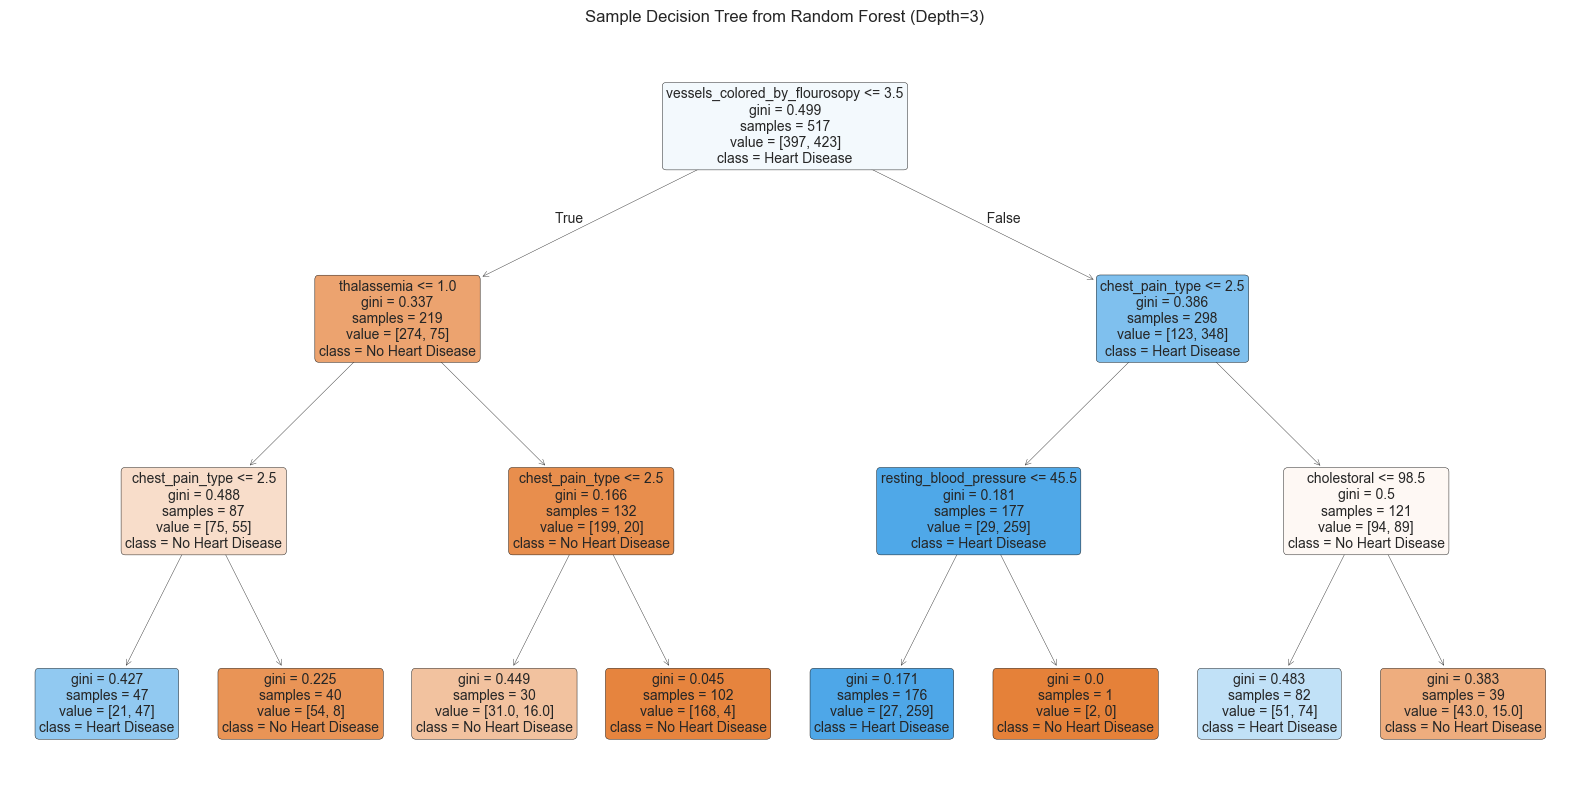

🔹 Note: This shows just one tree from the forest with limited depth for visualization purposes.
🔹 The actual Random Forest contains many deeper trees for better performance.


In [29]:
# Visualize one of the decision trees (limited depth for readability)
from sklearn.tree import plot_tree

# Create a smaller tree for visualization
small_rf = RandomForestClassifier(n_estimators=1, max_depth=3, random_state=42)
small_rf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(small_rf.estimators_[0], 
          feature_names=df.columns,
          class_names=labels,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Sample Decision Tree from Random Forest (Depth=3)')
plt.show()

print("🔹 Note: This shows just one tree from the forest with limited depth for visualization purposes.")
print("🔹 The actual Random Forest contains many deeper trees for better performance.")

## SVM implementation

In [30]:
from sklearn.svm import SVC
# Test different SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_results = {}

print("Training SVM models with different kernels:")
print("=" * 50)

for kernel in kernels:
    print(f"Training SVM with {kernel} kernel...")
    
    # Create and train SVM model
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = svm_model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    svm_results[kernel] = {
        'model': svm_model,
        'predictions': y_pred,
        'accuracy': accuracy
    }
    
    print(f"  {kernel.upper()} kernel accuracy: {accuracy:.4f}")

print("=" * 50)

Training SVM models with different kernels:
Training SVM with linear kernel...
  LINEAR kernel accuracy: 0.8293
Training SVM with poly kernel...
  POLY kernel accuracy: 0.9512
Training SVM with rbf kernel...
  RBF kernel accuracy: 0.9561
Training SVM with sigmoid kernel...
  SIGMOID kernel accuracy: 0.7902


Best performing kernel: RBF


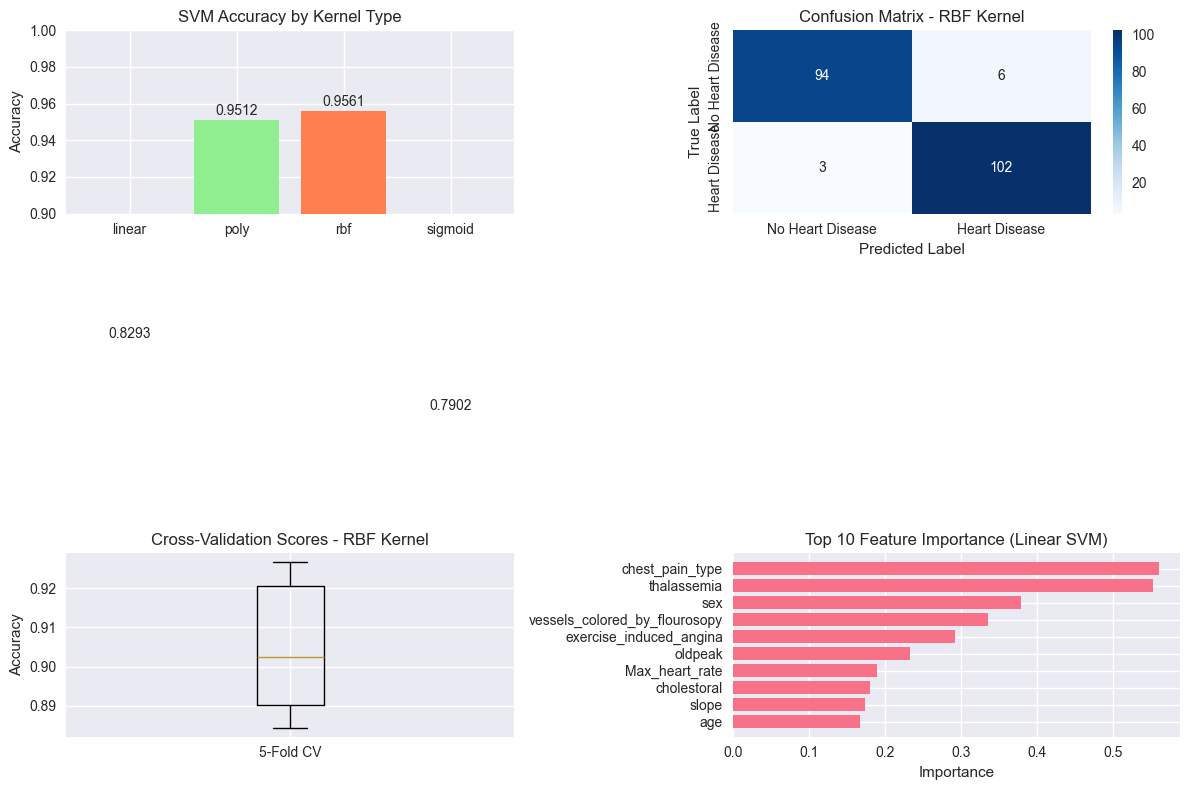

In [36]:
# Visualize kernel performance
plt.figure(figsize=(12, 8))

# Accuracy comparison
plt.subplot(2, 2, 1)
accuracies = [svm_results[kernel]['accuracy'] for kernel in kernels]
bars = plt.bar(kernels, accuracies, color=['skyblue', 'lightgreen', 'coral', 'plum'])
plt.title('SVM Accuracy by Kernel Type')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{accuracies[i]:.4f}', ha='center', va='bottom')

# Confusion matrices for best performing kernels
best_kernel = max(svm_results.keys(), key=lambda k: svm_results[k]['accuracy'])
print(f"Best performing kernel: {best_kernel.upper()}")

# Plot confusion matrix for best kernel
plt.subplot(2, 2, 2)
cm = confusion_matrix(y_test, svm_results[best_kernel]['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title(f'Confusion Matrix - {best_kernel.upper()} Kernel')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Cross-validation scores for best kernel
plt.subplot(2, 2, 3)
cv_scores = cross_val_score(svm_results[best_kernel]['model'], X_train_scaled, y_train, cv=5)
plt.boxplot(cv_scores)
plt.title(f'Cross-Validation Scores - {best_kernel.upper()} Kernel')
plt.ylabel('Accuracy')
plt.xticks([1], ['5-Fold CV'])

# Feature importance (for linear kernel only)
plt.subplot(2, 2, 4)
if 'linear' in svm_results:
    feature_importance = np.abs(svm_results['linear']['model'].coef_[0])
    top_features_idx = np.argsort(feature_importance)[-10:]
    top_features = [df.columns[i] for i in top_features_idx]
    top_importance = feature_importance[top_features_idx]
    
    plt.barh(range(len(top_features)), top_importance)
    plt.yticks(range(len(top_features)), top_features)
    plt.title('Top 10 Feature Importance (Linear SVM)')
    plt.xlabel('Importance')
else:
    plt.text(0.5, 0.5, 'Feature importance\nonly available for\nlinear kernel', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Feature Importance')

plt.tight_layout()
plt.show()

In [37]:
# Hyperparameter tuning using GridSearchCV for RBF kernel
print("Performing hyperparameter tuning for RBF kernel...")

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Create SVM model
svm_rbf = SVC(kernel='rbf', random_state=42)

# Perform grid search
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train the best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Test accuracy with best parameters: {best_accuracy:.4f}")

Performing hyperparameter tuning for RBF kernel...
Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.9817
Test accuracy with best parameters: 1.0000


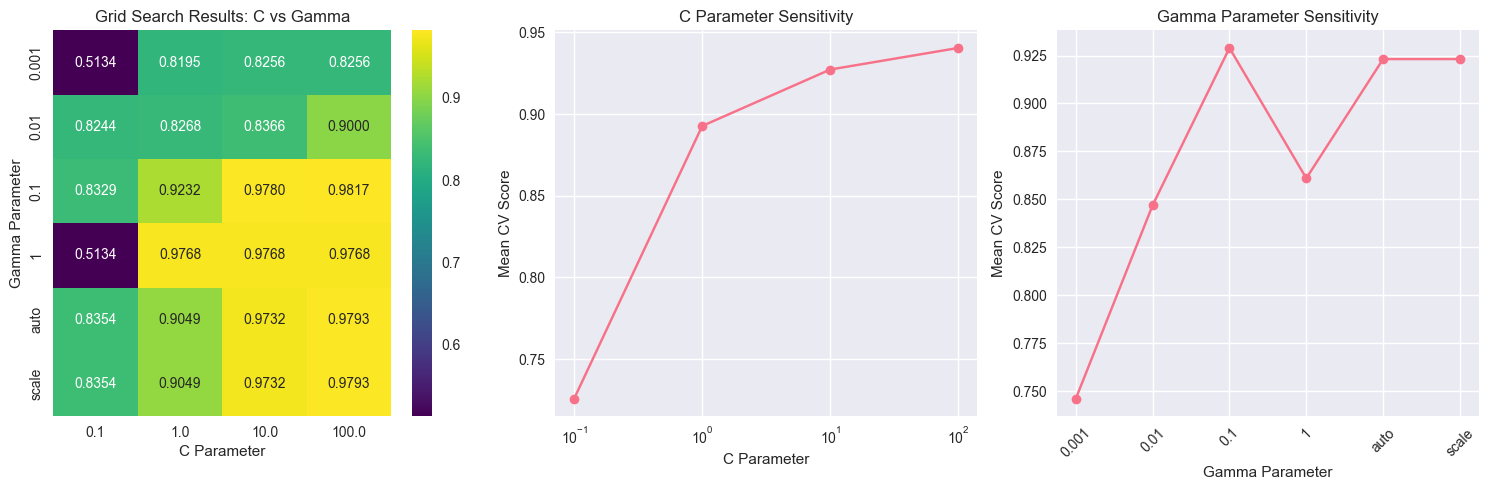

In [38]:
# Visualize hyperparameter tuning results
results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(15, 5))

# Heatmap of C vs gamma performance
plt.subplot(1, 3, 1)
pivot_table = results_df.pivot_table(values='mean_test_score', 
                                    index='param_gamma', 
                                    columns='param_C')
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='viridis')
plt.title('Grid Search Results: C vs Gamma')
plt.xlabel('C Parameter')
plt.ylabel('Gamma Parameter')

# Parameter sensitivity for C
plt.subplot(1, 3, 2)
c_scores = results_df.groupby('param_C')['mean_test_score'].mean()
plt.plot(c_scores.index, c_scores.values, marker='o')
plt.xlabel('C Parameter')
plt.ylabel('Mean CV Score')
plt.title('C Parameter Sensitivity')
plt.xscale('log')

# Parameter sensitivity for gamma
plt.subplot(1, 3, 3)
gamma_scores = results_df.groupby('param_gamma')['mean_test_score'].mean()
plt.plot(range(len(gamma_scores)), gamma_scores.values, marker='o')
plt.xlabel('Gamma Parameter')
plt.ylabel('Mean CV Score')
plt.title('Gamma Parameter Sensitivity')
plt.xticks(range(len(gamma_scores)), gamma_scores.index, rotation=45)

plt.tight_layout()
plt.show()

Detailed Evaluation of Best SVM Model:
Best parameters: {'C': 100, 'gamma': 0.1}
Accuracy: 1.0000

Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       1.00      1.00      1.00       100
   Heart Disease       1.00      1.00      1.00       105

        accuracy                           1.00       205
       macro avg       1.00      1.00      1.00       205
    weighted avg       1.00      1.00      1.00       205



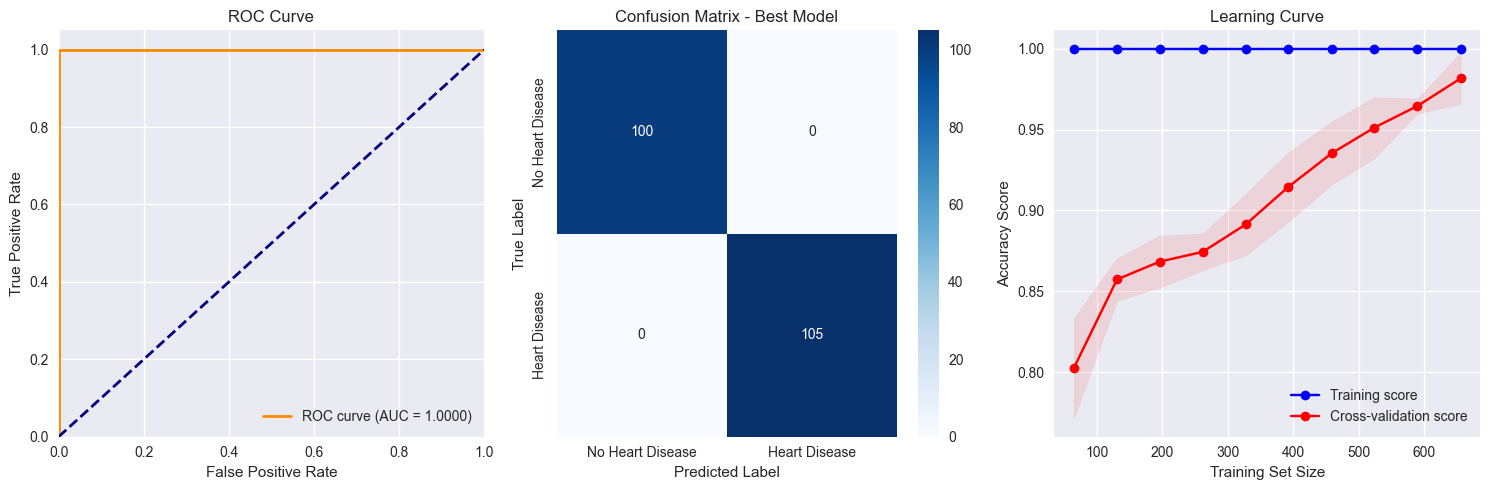

In [39]:
# Detailed evaluation of the best model
print("Detailed Evaluation of Best SVM Model:")
print("=" * 50)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Accuracy: {best_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=labels))

# ROC Curve
y_pred_proba = best_svm.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 5))

# ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Confusion Matrix
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Best Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Learning curve
from sklearn.model_selection import learning_curve

plt.subplot(1, 3, 3)
train_sizes, train_scores, val_scores = learning_curve(
    best_svm, X_train_scaled, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_mean, 'o-', color='red', label='Cross-validation score')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Creating 2D visualization using PCA...


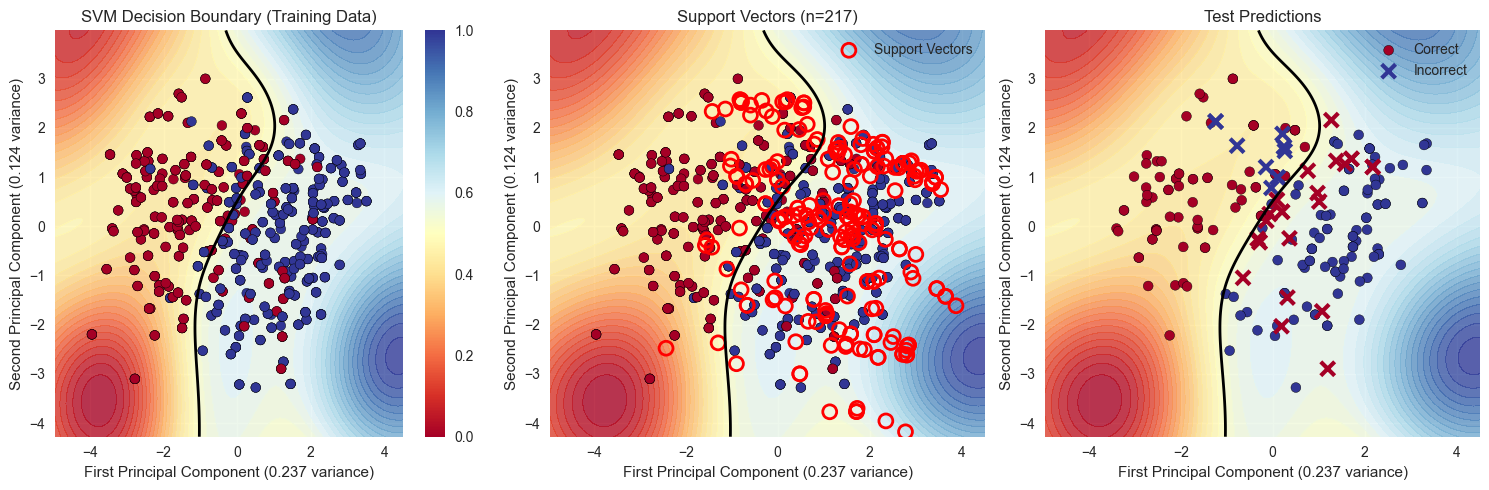

PCA explained variance: 0.360


In [40]:
# Visualize decision boundary using PCA for 2D representation
print("Creating 2D visualization using PCA...")

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM on PCA-transformed data
svm_pca = SVC(kernel='rbf', C=grid_search.best_params_['C'], 
              gamma=grid_search.best_params_['gamma'], random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Create a mesh for decision boundary
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(15, 5))

# Decision boundary
plt.subplot(1, 3, 1)
Z = svm_pca.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Plot training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='RdYlBu', edgecolors='black')
plt.colorbar(scatter)
plt.title('SVM Decision Boundary (Training Data)')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.3f} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.3f} variance)')

# Support vectors
plt.subplot(1, 3, 2)
plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='RdYlBu', edgecolors='black')

# Highlight support vectors
support_vectors_pca = pca.transform(scaler.transform(best_svm.support_vectors_))
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], 
           s=100, facecolors='none', edgecolors='red', linewidths=2, label='Support Vectors')
plt.title(f'Support Vectors (n={len(best_svm.support_vectors_)})')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.3f} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.3f} variance)')
plt.legend()

# Test predictions
plt.subplot(1, 3, 3)
plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Plot test points with predictions
y_pred_pca = svm_pca.predict(X_test_pca)
correct_pred = (y_pred_pca == y_test)
plt.scatter(X_test_pca[correct_pred, 0], X_test_pca[correct_pred, 1], 
           c=y_test[correct_pred], cmap='RdYlBu', edgecolors='black', 
           marker='o', s=50, label='Correct')
plt.scatter(X_test_pca[~correct_pred, 0], X_test_pca[~correct_pred, 1], 
           c=y_test[~correct_pred], cmap='RdYlBu', edgecolors='red', 
           marker='x', s=100, linewidths=3, label='Incorrect')
plt.title('Test Predictions')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.3f} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.3f} variance)')
plt.legend()

plt.tight_layout()
plt.show()

print(f"PCA explained variance: {pca.explained_variance_ratio_.sum():.3f}")

## PCA 

In [41]:
from sklearn.decomposition import PCA

In [42]:
# Apply PCA with all components first to analyze variance
pca_full = PCA()
X_train_pca_full = pca_full.fit_transform(X_train_scaled)

# Analyze explained variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("PCA Analysis:")
print(f"Total features: {X_train_scaled.shape[1]}")
print(f"Total principal components: {len(explained_variance_ratio)}")

# Find number of components for different variance thresholds
for threshold in [0.8, 0.9, 0.95, 0.99]:
    n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
    print(f"Components needed for {threshold*100}% variance: {n_components}")

print(f"\nFirst 10 components explain {cumulative_variance_ratio[9]:.4f} of variance")
print(f"First 5 components explain {cumulative_variance_ratio[4]:.4f} of variance")
print(f"First 2 components explain {cumulative_variance_ratio[1]:.4f} of variance")

PCA Analysis:
Total features: 13
Total principal components: 13
Components needed for 80.0% variance: 8
Components needed for 90.0% variance: 10
Components needed for 95.0% variance: 12
Components needed for 99.0% variance: 13

First 10 components explain 0.9009 of variance
First 5 components explain 0.6173 of variance
First 2 components explain 0.3601 of variance


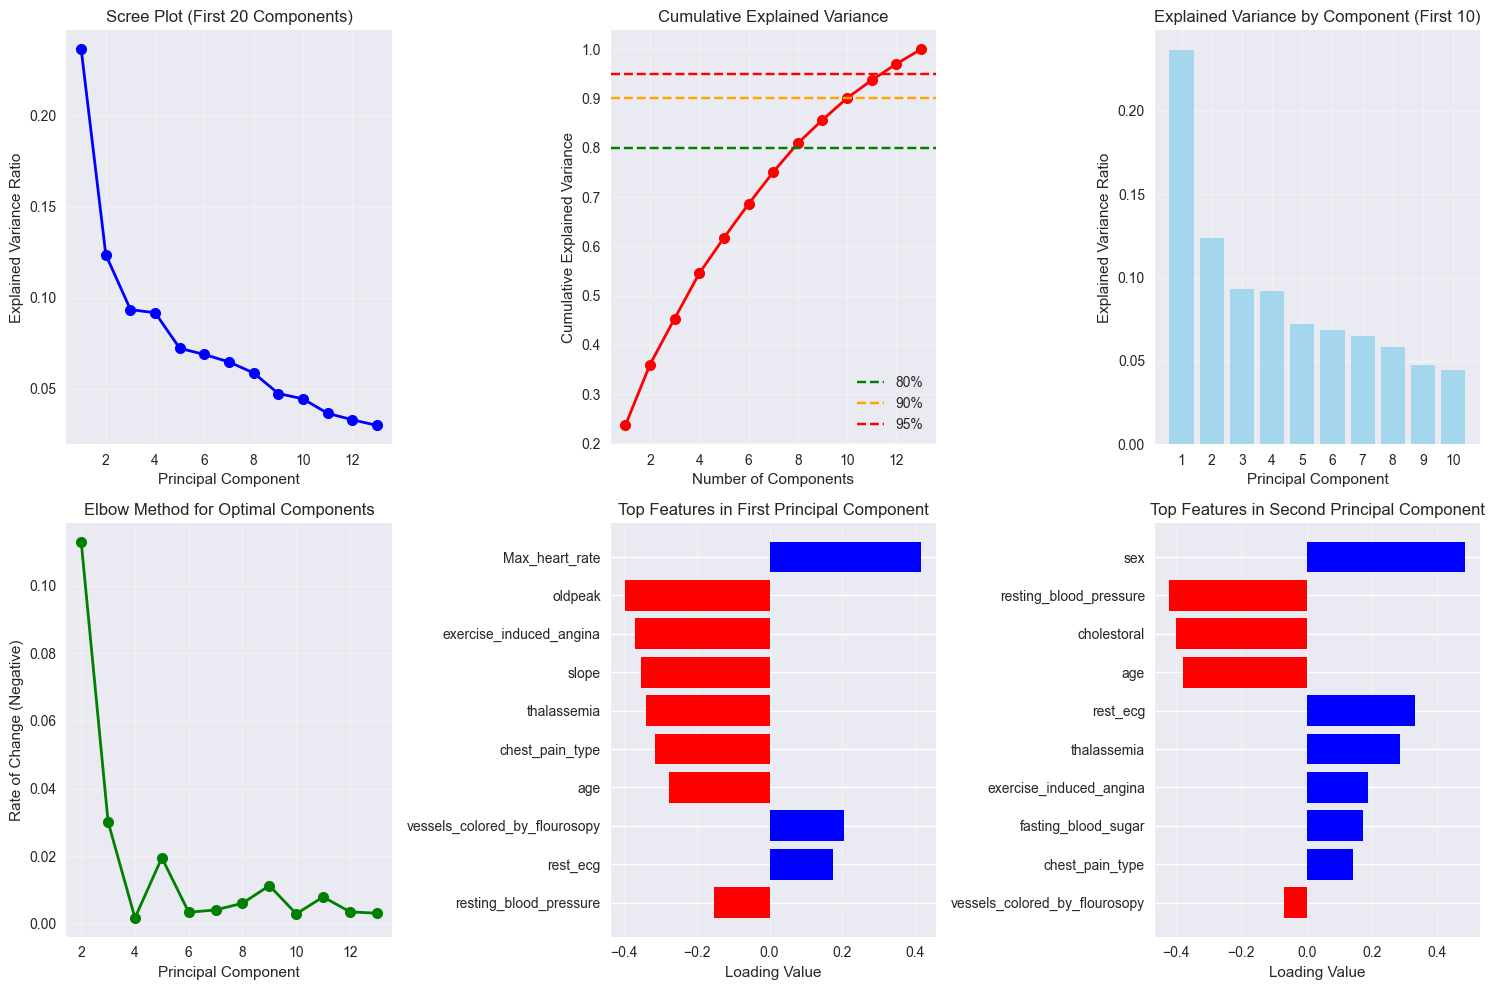

Detailed Variance Analysis:
PC1: 0.2365 (23.65%)
  Cumulative: 0.2365 (23.65%)

PC2: 0.1235 (12.35%)
  Cumulative: 0.3601 (36.01%)

PC3: 0.0934 (9.34%)
  Cumulative: 0.4535 (45.35%)

PC4: 0.0917 (9.17%)
  Cumulative: 0.5452 (54.52%)

PC5: 0.0722 (7.22%)
  Cumulative: 0.6173 (61.73%)

PC6: 0.0687 (6.87%)
  Cumulative: 0.6861 (68.61%)

PC7: 0.0647 (6.47%)
  Cumulative: 0.7507 (75.07%)

PC8: 0.0586 (5.86%)
  Cumulative: 0.8093 (80.93%)

PC9: 0.0473 (4.73%)
  Cumulative: 0.8566 (85.66%)

PC10: 0.0444 (4.44%)
  Cumulative: 0.9009 (90.09%)



In [49]:
# Visualize explained variance
plt.figure(figsize=(15, 10))

# Scree plot
plt.subplot(2, 3, 1)
plt.plot(range(1, 14), explained_variance_ratio[:20], 'bo-', linewidth=2, markersize=8)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (First 20 Components)')
plt.grid(True, alpha=0.3)

# Cumulative explained variance
plt.subplot(2, 3, 2)
plt.plot(range(1, 14), cumulative_variance_ratio[:20], 'ro-', linewidth=2, markersize=8)
plt.axhline(y=0.8, color='green', linestyle='--', label='80%')
plt.axhline(y=0.9, color='orange', linestyle='--', label='90%')
plt.axhline(y=0.95, color='red', linestyle='--', label='95%')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)

# Bar plot of first 10 components
plt.subplot(2, 3, 3)
plt.bar(range(1, 11), explained_variance_ratio[:10], color='skyblue', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component (First 10)')
plt.xticks(range(1, 11))
plt.grid(True, alpha=0.3)

# Elbow method visualization
plt.subplot(2, 3, 4)
# Calculate the rate of change in explained variance
diff_variance = np.diff(explained_variance_ratio[:15])
plt.plot(range(2, 14), -diff_variance, 'go-', linewidth=2, markersize=8)
plt.xlabel('Principal Component')
plt.ylabel('Rate of Change (Negative)')
plt.title('Elbow Method for Optimal Components')
plt.grid(True, alpha=0.3)

# Feature importance in first PC
plt.subplot(2, 3, 5)
pc1_loadings = pca_full.components_[0]
sorted_idx = np.argsort(np.abs(pc1_loadings))[-10:]  # Top 10 features
top_features = [df.columns[i] for i in sorted_idx]
top_loadings = pc1_loadings[sorted_idx]

plt.barh(range(len(top_features)), top_loadings, 
         color=['red' if x < 0 else 'blue' for x in top_loadings])
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Loading Value')
plt.title('Top Features in First Principal Component')
plt.grid(axis='x', alpha=0.3)

# Feature importance in second PC
plt.subplot(2, 3, 6)
pc2_loadings = pca_full.components_[1]
sorted_idx = np.argsort(np.abs(pc2_loadings))[-10:]  # Top 10 features
top_features = [df.columns[i] for i in sorted_idx]
top_loadings = pc2_loadings[sorted_idx]

plt.barh(range(len(top_features)), top_loadings, 
         color=['red' if x < 0 else 'blue' for x in top_loadings])
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Loading Value')
plt.title('Top Features in Second Principal Component')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed variance information
print("Detailed Variance Analysis:")
for i in range(min(10, len(explained_variance_ratio))):
    print(f"PC{i+1}: {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}%)")
    print(f"  Cumulative: {cumulative_variance_ratio[i]:.4f} ({cumulative_variance_ratio[i]*100:.2f}%)")
    print()

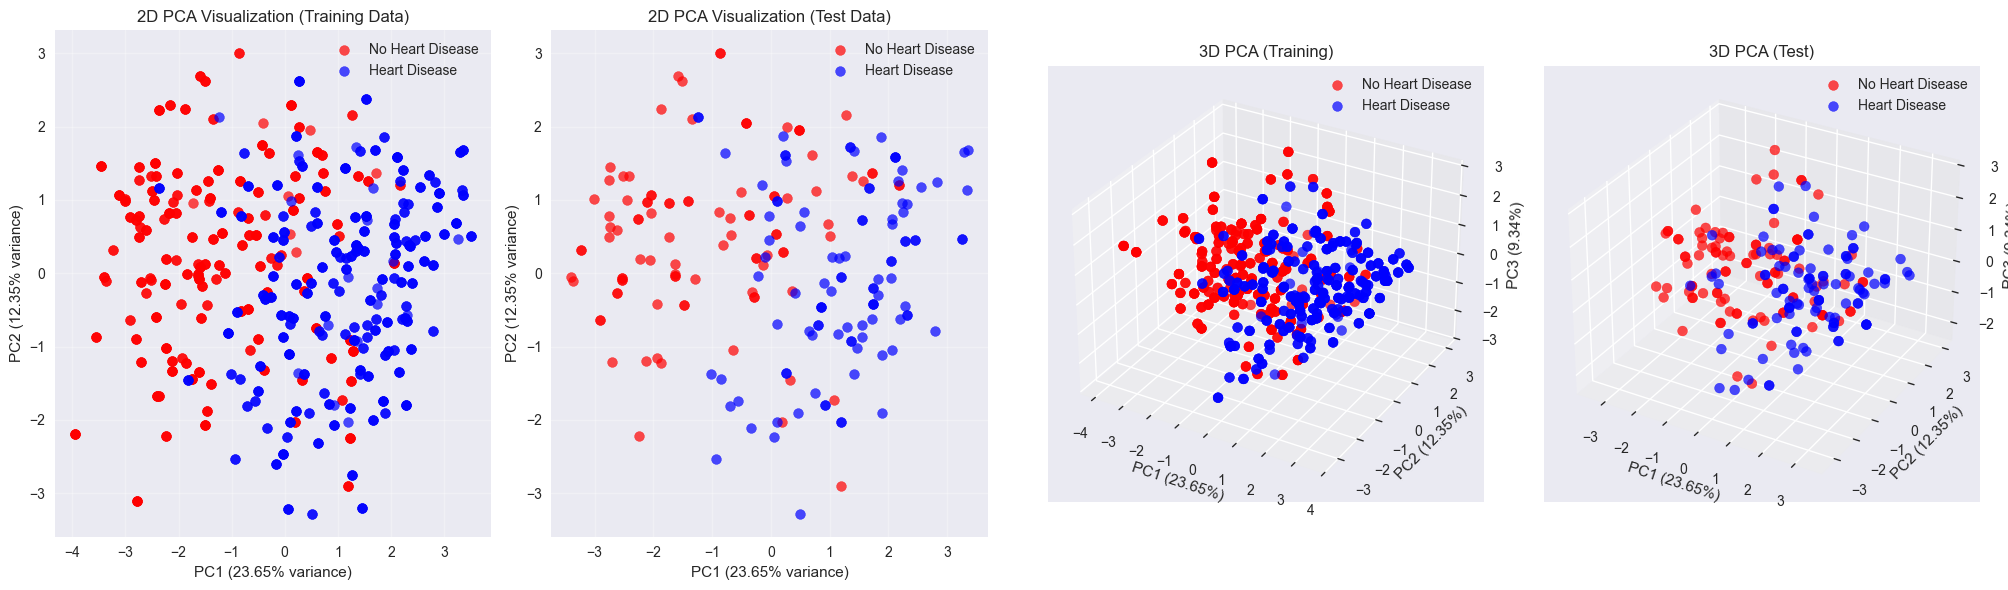

PCA Visualization Summary:
2D PCA explains 0.3601 of total variance
3D PCA explains 0.4535 of total variance
PC1: 0.2365
PC2: 0.1235
PC3: 0.0934


In [50]:
# Create PCA models for 2D and 3D visualization
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)
X_test_pca_2d = pca_2d.transform(X_test_scaled)

X_train_pca_3d = pca_3d.fit_transform(X_train_scaled)
X_test_pca_3d = pca_3d.transform(X_test_scaled)

# 2D and 3D visualization
plt.figure(figsize=(20, 6))

# 2D PCA visualization - Training data
plt.subplot(1, 4, 1)
colors = ['red', 'blue']
for i, (color, label) in enumerate(zip(colors, labels)):
    mask = y_train == i
    plt.scatter(X_train_pca_2d[mask, 0], X_train_pca_2d[mask, 1], 
                c=color, label=label, alpha=0.7, s=50)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.title('2D PCA Visualization (Training Data)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2D PCA visualization - Test data
plt.subplot(1, 4, 2)
for i, (color, label) in enumerate(zip(colors, labels)):
    mask = y_test == i
    plt.scatter(X_test_pca_2d[mask, 0], X_test_pca_2d[mask, 1], 
                c=color, label=label, alpha=0.7, s=50)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.title('2D PCA Visualization (Test Data)')
plt.legend()
plt.grid(True, alpha=0.3)

# 3D PCA visualization - Training data
ax1 = plt.subplot(1, 4, 3, projection='3d')
for i, (color, label) in enumerate(zip(colors, labels)):
    mask = y_train == i
    ax1.scatter(X_train_pca_3d[mask, 0], X_train_pca_3d[mask, 1], X_train_pca_3d[mask, 2],
                c=color, label=label, alpha=0.7, s=50)

ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax1.set_title('3D PCA (Training)')
ax1.legend()

# 3D PCA visualization - Test data
ax2 = plt.subplot(1, 4, 4, projection='3d')
for i, (color, label) in enumerate(zip(colors, labels)):
    mask = y_test == i
    ax2.scatter(X_test_pca_3d[mask, 0], X_test_pca_3d[mask, 1], X_test_pca_3d[mask, 2],
                c=color, label=label, alpha=0.7, s=50)

ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})')
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})')
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})')
ax2.set_title('3D PCA (Test)')
ax2.legend()

plt.tight_layout()
plt.show()

print("PCA Visualization Summary:")
print(f"2D PCA explains {pca_2d.explained_variance_ratio_.sum():.4f} of total variance")
print(f"3D PCA explains {pca_3d.explained_variance_ratio_.sum():.4f} of total variance")
print(f"PC1: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca_2d.explained_variance_ratio_[1]:.4f}")
print(f"PC3: {pca_3d.explained_variance_ratio_[2]:.4f}")